In [23]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import joblib
import re
import sys
sys.path.insert(0, '../')
import numpy as np

# Datasets
from aif360.datasets import MEPSDataset19
# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler


# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing,DisparateImpactRemover
from aif360.algorithms.preprocessing import LFR
from aif360.algorithms.preprocessing import OptimPreproc


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
dataset_orig_panel19 = MEPSDataset19()

In [26]:
dataset_orig_panel19_train = MEPSDataset19()

In [27]:
dataset_orig_panel19_train.features

array([[53.  ,  1.  , 25.93, ...,  0.  ,  1.  ,  0.  ],
       [56.  ,  1.  , 20.42, ...,  0.  ,  1.  ,  0.  ],
       [23.  ,  1.  , 53.12, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 2.  ,  1.  , -1.  , ...,  0.  ,  1.  ,  0.  ],
       [54.  ,  0.  , 43.97, ...,  0.  ,  1.  ,  0.  ],
       [73.  ,  0.  , 42.68, ...,  0.  ,  1.  ,  0.  ]])

In [28]:
sens_ind = 0
sens_attr = dataset_orig_panel19_train.protected_attribute_names[sens_ind]
unprivileged_groups = [{sens_attr: v} for v in
                    dataset_orig_panel19_train.unprivileged_protected_attributes[sens_ind]]
privileged_groups = [{sens_attr: v} for v in
                    dataset_orig_panel19_train.privileged_protected_attributes[sens_ind]]

In [29]:
sens_attr

'RACE'

In [30]:
privileged_groups

[{'RACE': 1.0}]

In [31]:
unprivileged_groups

[{'RACE': 0.0}]

In [32]:
dataset_orig_panel19_train

               instance weights features                                    \
                                         protected attribute                 
                                     AGE                RACE  PCS42  MCS42   
instance names                                                               
0                  21854.981705     53.0                 1.0  25.93  58.47   
1                  18169.604822     56.0                 1.0  20.42  26.57   
3                  17191.832515     23.0                 1.0  53.12  50.33   
4                  20261.485463      3.0                 1.0  -1.00  -1.00   
5                      0.000000     27.0                 0.0  -1.00  -1.00   
...                         ...      ...                 ...    ...    ...   
16573               4111.315754     25.0                 0.0  56.71  62.39   
16574               5415.228173     25.0                 0.0  56.71  62.39   
16575               3896.116219      2.0                 1.0  -1

In [33]:
metric_orig_panel19_train = BinaryLabelDatasetMetric(
        dataset_orig_panel19_train,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups)

In [34]:
explainer_orig_panel19_train = MetricTextExplainer(metric_orig_panel19_train)


In [35]:
test_name=['Mean Difference','Consistency','Statistical Parity Difference','Disparate Impact']
test_definitions=['difference between mean values of two labels','Individual fairness metric that measures how similar the labels are for similar instances.','Difference in selection rates.','ratio of positive outcomes in the unprivileged group divided by the ratio of positive outcomes in the privileged group.']
test_results=[explainer_orig_panel19_train.mean_difference(),explainer_orig_panel19_train.consistency(),explainer_orig_panel19_train.statistical_parity_difference(),explainer_orig_panel19_train.disparate_impact()]
test_status=['Bias Detected','Bias Not Detected','Bias Detected','Bias Detected']
df=pd.DataFrame({'Test Name':test_name,'Test Definitions':test_definitions,'Test Results':test_results,'Test Status':test_status})


In [36]:
test_results

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.13507447726478142',
 'Consistency (Zemel, et al. 2013): [0.83665193]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.13507447726478142',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.49826823461176517']

In [37]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_panel19_train_rw = RW.fit_transform(dataset_orig_panel19_train)

In [38]:
# Calculate Statistical Parity Difference
statistical_parity_difference = metric_orig_panel19_train.statistical_parity_difference()
print("Statistical Parity Difference (SPD):", statistical_parity_difference)

# Calculate Disparate Impact
disparate_impact = metric_orig_panel19_train.disparate_impact()
print("Disparate Impact (DI):", disparate_impact)


Statistical Parity Difference (SPD): -0.13507447726478142
Disparate Impact (DI): 0.49826823461176517


In [58]:
X_train[1]

array([37.  ,  0.  , 48.09, 36.94,  7.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data
X = dataset_orig_panel19_train.features
y = dataset_orig_panel19_train.labels.ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities on the same scaled training data
train_probabilities = model.predict_proba(X_train_scaled)[:, 1]

# Calculation of discrimination index without modifying dataset structure
sens_attr_index = dataset_orig_panel19_train.feature_names.index('RACE')

def calculate_discrimination(X, probabilities, sens_attr_index, unprivileged_val, privileged_val):
    # Filter by sensitive attribute for unprivileged and privileged groups
    unpriv_indices = X[:, sens_attr_index] == unprivileged_val
    priv_indices = X[:, sens_attr_index] == privileged_val
    
    # Calculate mean probabilities for both groups
    mean_prob_unpriv = probabilities[unpriv_indices].mean()
    mean_prob_priv = probabilities[priv_indices].mean()
    # Discrimination index
    discrimination = mean_prob_priv - mean_prob_unpriv
    return discrimination

# Define unprivileged and privileged values
unprivileged_val = 0.0
privileged_val = 1.0

# Compute discrimination
discrimination_index = calculate_discrimination(X_train, train_probabilities, sens_attr_index, unprivileged_val, privileged_val)
print("Discrimination Index: {:.4f}".format(discrimination_index))


Discrimination Index: 0.1315


### DEFINING custom_loss FUNCTION with Standard Lambda = 0.5

In [49]:
X_train_scaled

array([[-0.76152525, -0.7401269 , -1.16660499, ..., -1.06074916,
        -0.744093  ,  2.78531021],
       [ 0.08369436, -0.7401269 ,  0.72413337, ..., -1.06074916,
        -0.744093  ,  2.78531021],
       [-0.45012855, -0.7401269 ,  0.94174738, ...,  0.94272994,
        -0.744093  , -0.35902644],
       ...,
       [ 0.79545824,  1.35111965,  0.09517111, ..., -1.06074916,
         1.34391803, -0.35902644],
       [-0.09424661, -0.7401269 ,  1.09658071, ...,  0.94272994,
        -0.744093  , -0.35902644],
       [-0.62806952, -0.7401269 ,  0.4680036 , ...,  0.94272994,
        -0.744093  , -0.35902644]])

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Adjust input size to exclude sensitive attribute
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Custom loss function
def custom_loss(output, target, sensitive_features, lambda_val=0.1, k=6):
    criterion = nn.BCELoss()
    standard_loss = criterion(output, target)

    mask_unpriv = (sensitive_features == 0)
    mask_priv = (sensitive_features == 1)
    
    if torch.sum(mask_unpriv) > 0 and torch.sum(mask_priv) > 0:
        prob_unpriv = torch.mean(output[mask_unpriv])
        prob_priv = torch.mean(output[mask_priv])
        discrimination = (prob_priv - prob_unpriv) ** k
    else:
        discrimination = torch.tensor(0.0)  # Handle cases where one group might be missing

    return standard_loss + lambda_val * discrimination

# Assuming your dataset is loaded correctly
data = torch.tensor(X_train_scaled).float()  # Make sure this conversion is done correctly
targets = torch.tensor(y_train).float().unsqueeze(1)  # Ensure targets are correctly shaped
sensitive_features = data[:, 1]  # Extract the sensitive features
features = torch.cat((data[:, :1], data[:, 2:]), dim=1)  # Exclude the sensitive attribute from the main features

model = BinaryClassifier(features.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(features)
    loss = custom_loss(outputs, targets.squeeze(), sensitive_features)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.6436237692832947
Epoch 2, Loss: 0.6127090454101562
Epoch 3, Loss: 0.5840549468994141
Epoch 4, Loss: 0.557695209980011
Epoch 5, Loss: 0.5335997343063354
Epoch 6, Loss: 0.5117872953414917
Epoch 7, Loss: 0.49214401841163635
Epoch 8, Loss: 0.47453635931015015
Epoch 9, Loss: 0.45879927277565
Epoch 10, Loss: 0.44474470615386963


In [79]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Custom loss function
def custom_loss(output, target, sensitive_features, lambda_val=0.01, k=2):
    criterion = nn.BCELoss()
    standard_loss = criterion(output, target)

    mask_unpriv = (sensitive_features == 0)
    mask_priv = (sensitive_features == 1)
    
    if torch.sum(mask_unpriv) > 0 and torch.sum(mask_priv) > 0:
        prob_unpriv = torch.mean(output[mask_unpriv])
        prob_priv = torch.mean(output[mask_priv])
        discrimination = (prob_priv - prob_unpriv) ** k
    else:
        discrimination = torch.tensor(0.0)  # Handle cases where one group might be missing

    return standard_loss + lambda_val * discrimination

def calculate_accuracy(predictions, targets):
    predicted_classes = (predictions >= 0.5).float()
    return (predicted_classes == targets).float().mean()

# Data preparation
data = torch.tensor(X_train_scaled).float()
targets = torch.tensor(y_train).float().unsqueeze(1)
sensitive_features = data[:, 1]
features = torch.cat((data[:, :1], data[:, 2:]), dim=1)

# Test data (assuming it's prepared similarly)
test_data = torch.tensor(X_test_scaled).float()
test_targets = torch.tensor(y_test).float().unsqueeze(1)
test_sensitive_features = test_data[:, 1]
test_features = torch.cat((test_data[:, :1], test_data[:, 2:]), dim=1)

model = BinaryClassifier(features.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
model.train()
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(features)
    loss = custom_loss(outputs, targets.squeeze(), sensitive_features)
    train_accuracy = calculate_accuracy(outputs, targets.squeeze())
    loss.backward()
    optimizer.step()
    
    # Evaluation on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = custom_loss(test_outputs, test_targets.squeeze(), test_sensitive_features)
        test_accuracy = calculate_accuracy(test_outputs, test_targets.squeeze())
    
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Train Acc: {train_accuracy.item()*100:.2f}%, '
          f'Test Loss: {test_loss.item()}, Test Acc: {test_accuracy.item()*100:.2f}%')
    model.train()


Epoch 1, Train Loss: 0.7673807740211487, Train Acc: 24.21%, Test Loss: 0.7409172654151917, Test Acc: 31.46%
Epoch 2, Train Loss: 0.7404283881187439, Train Acc: 32.01%, Test Loss: 0.716571569442749, Test Acc: 41.63%
Epoch 3, Train Loss: 0.7157283425331116, Train Acc: 41.29%, Test Loss: 0.6942327618598938, Test Acc: 53.85%
Epoch 4, Train Loss: 0.693112313747406, Train Acc: 53.62%, Test Loss: 0.6738004684448242, Test Acc: 67.66%
Epoch 5, Train Loss: 0.6722973585128784, Train Acc: 68.04%, Test Loss: 0.6548610329627991, Test Acc: 74.76%
Epoch 6, Train Loss: 0.6529971957206726, Train Acc: 75.09%, Test Loss: 0.637105405330658, Test Acc: 77.51%
Epoch 7, Train Loss: 0.6348973512649536, Train Acc: 78.02%, Test Loss: 0.6203395128250122, Test Acc: 79.41%
Epoch 8, Train Loss: 0.6178111433982849, Train Acc: 79.60%, Test Loss: 0.6044129729270935, Test Acc: 80.51%
Epoch 9, Train Loss: 0.6016006469726562, Train Acc: 80.84%, Test Loss: 0.589247465133667, Test Acc: 81.30%
Epoch 10, Train Loss: 0.58615773

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Initialize binary cross-entropy loss
criterion = nn.BCELoss()

def calculate_accuracy(predictions, targets):
    predicted_classes = (predictions >= 0.5).float()
    return (predicted_classes == targets).float().mean()

# Data preparation
data = torch.tensor(X_train_scaled).float()
targets = torch.tensor(y_train).float().unsqueeze(1)
sensitive_features = data[:, 1]
features = torch.cat((data[:, :1], data[:, 2:]), dim=1)

# Test data (assuming it's prepared similarly)
test_data = torch.tensor(X_test_scaled).float()
test_targets = torch.tensor(y_test).float().unsqueeze(1)
test_sensitive_features = test_data[:, 1]
test_features = torch.cat((test_data[:, :1], test_data[:, 2:]), dim=1)

model = BinaryClassifier(features.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
model.train()
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(features)
    loss = criterion(outputs, targets.squeeze())
    train_accuracy = calculate_accuracy(outputs, targets.squeeze())
    loss.backward()
    optimizer.step()
    
    # Evaluation on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = criterion(test_outputs, test_targets.squeeze())
        test_accuracy = calculate_accuracy(test_outputs, test_targets.squeeze())
    
    print(f'Epoch {epoch+1}, Train Loss: {loss.item()}, Train Acc: {train_accuracy.item()*100:.2f}%, '
          f'Test Loss: {test_loss.item()}, Test Acc: {test_accuracy.item()*100:.2f}%')
    model.train()


Epoch 1, Train Loss: 0.7674269676208496, Train Acc: 34.36%, Test Loss: 0.7305501103401184, Test Acc: 39.80%
Epoch 2, Train Loss: 0.7305780053138733, Train Acc: 40.48%, Test Loss: 0.6975762248039246, Test Acc: 49.31%
Epoch 3, Train Loss: 0.6973879337310791, Train Acc: 49.25%, Test Loss: 0.668036162853241, Test Acc: 66.20%
Epoch 4, Train Loss: 0.6675889492034912, Train Acc: 66.80%, Test Loss: 0.6415244936943054, Test Acc: 75.43%
Epoch 5, Train Loss: 0.6408513188362122, Train Acc: 75.71%, Test Loss: 0.61774742603302, Test Acc: 78.68%
Epoch 6, Train Loss: 0.6167588233947754, Train Acc: 78.40%, Test Loss: 0.5962265729904175, Test Acc: 80.39%
Epoch 7, Train Loss: 0.5949429273605347, Train Acc: 80.14%, Test Loss: 0.5766510367393494, Test Acc: 81.40%
Epoch 8, Train Loss: 0.5751211643218994, Train Acc: 81.06%, Test Loss: 0.5587018132209778, Test Acc: 81.84%
Epoch 9, Train Loss: 0.5569527745246887, Train Acc: 81.71%, Test Loss: 0.5421833395957947, Test Acc: 82.25%
Epoch 10, Train Loss: 0.5401964

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Helper function to calculate accuracy
def binary_accuracy(y_pred, y_true):
    # Applying threshold to get binary output
    y_pred_tag = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum / y_true.shape[0]
    acc = torch.round(acc * 100)
    return acc

# Custom discrimination loss function
def discrimination_loss(outputs, targets, sensitive_features, lambda_val=0.5, k=2):
    criterion = nn.BCELoss()
    standard_loss = criterion(outputs, targets)

    mask_unpriv = (sensitive_features == 0)
    mask_priv = (sensitive_features == 1)

    prob_unpriv = torch.mean(outputs[mask_unpriv])
    prob_priv = torch.mean(outputs[mask_priv])
    discrimination = (prob_priv - prob_unpriv) ** k
    return standard_loss + lambda_val * discrimination

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Define a simple binary crossentropy loss model for comparison
class SimpleBinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(SimpleBinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Prepare datasets
dataset = TensorDataset(features, targets, sensitive_features)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize model and optimizer
model = BinaryClassifier(features.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, optimizer, train_loader, val_loader, custom_loss=None):
    for epoch in range(10):
        model.train()
        train_loss = 0
        train_acc = 0
        for inputs, labels, sens in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            if custom_loss:
                loss = custom_loss(outputs, labels.squeeze(), sens.squeeze())
            else:
                loss = nn.BCELoss()(outputs, labels.squeeze())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += binary_accuracy(outputs, labels.squeeze()).item()

        # Validation phase
        model.eval()
        val_loss = 0
        val_acc = 0
        with torch.no_grad():
            for inputs, labels, sens in val_loader:
                outputs = model(inputs)
                if custom_loss:
                    loss = custom_loss(outputs, labels.squeeze(), sens.squeeze())
                else:
                    loss = nn.BCELoss()(outputs, labels.squeeze())
                val_loss += loss.item()
                val_acc += binary_accuracy(outputs, labels.squeeze()).item()

        # Average loss and accuracy
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}')

# Train the model with discrimination loss

# Train another model with only binary crossentropy



In [70]:
train_model(model, optimizer, train_loader, val_loader, custom_loss=discrimination_loss)


Epoch 1, Train Loss: nan, Train Acc: 85.77, Val Loss: nan, Val Acc: 85.97
Epoch 2, Train Loss: nan, Train Acc: 86.90, Val Loss: nan, Val Acc: 86.05
Epoch 3, Train Loss: nan, Train Acc: 87.13, Val Loss: nan, Val Acc: 86.30
Epoch 4, Train Loss: nan, Train Acc: 87.40, Val Loss: nan, Val Acc: 86.24
Epoch 5, Train Loss: nan, Train Acc: 87.93, Val Loss: nan, Val Acc: 86.33
Epoch 6, Train Loss: nan, Train Acc: 88.23, Val Loss: nan, Val Acc: 86.01
Epoch 7, Train Loss: nan, Train Acc: 88.21, Val Loss: nan, Val Acc: 86.25
Epoch 8, Train Loss: nan, Train Acc: 88.37, Val Loss: nan, Val Acc: 86.17
Epoch 9, Train Loss: nan, Train Acc: 88.96, Val Loss: nan, Val Acc: 85.75
Epoch 10, Train Loss: nan, Train Acc: 88.86, Val Loss: nan, Val Acc: 85.99


In [71]:
simple_model = SimpleBinaryClassifier(features.shape[1])
simple_optimizer = optim.Adam(simple_model.parameters(), lr=0.001)
train_model(simple_model, simple_optimizer, train_loader, val_loader)

Epoch 1, Train Loss: 0.3526, Train Acc: 85.74, Val Loss: 0.3346, Val Acc: 86.34
Epoch 2, Train Loss: 0.3199, Train Acc: 86.70, Val Loss: 0.3338, Val Acc: 85.76
Epoch 3, Train Loss: 0.3129, Train Acc: 87.31, Val Loss: 0.3343, Val Acc: 86.40
Epoch 4, Train Loss: 0.3095, Train Acc: 87.41, Val Loss: 0.3304, Val Acc: 86.11
Epoch 5, Train Loss: 0.3047, Train Acc: 87.72, Val Loss: 0.3305, Val Acc: 86.55
Epoch 6, Train Loss: 0.2998, Train Acc: 88.05, Val Loss: 0.3306, Val Acc: 86.38
Epoch 7, Train Loss: 0.2960, Train Acc: 88.30, Val Loss: 0.3326, Val Acc: 86.10
Epoch 8, Train Loss: 0.2913, Train Acc: 88.62, Val Loss: 0.3351, Val Acc: 85.94
Epoch 9, Train Loss: 0.2864, Train Acc: 88.95, Val Loss: 0.3380, Val Acc: 86.04
Epoch 10, Train Loss: 0.2806, Train Acc: 89.21, Val Loss: 0.3388, Val Acc: 85.90


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Helper function to calculate accuracy
def binary_accuracy(y_pred, y_true):
    # Applying threshold to get binary output
    y_pred_tag = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum / y_true.shape[0]
    acc = torch.round(acc * 100)
    return acc

# Custom discrimination loss function
def discrimination_loss(outputs, targets, sensitive_features, lambda_val=0.5, k=2):
    criterion = nn.BCELoss()
    standard_loss = criterion(outputs, targets)

    mask_unpriv = (sensitive_features == 0)
    mask_priv = (sensitive_features == 1)

    prob_unpriv = torch.mean(outputs[mask_unpriv])
    prob_priv = torch.mean(outputs[mask_priv])
    discrimination = (prob_priv - prob_unpriv) ** k
    return standard_loss + lambda_val * discrimination

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

# Define a simple binary crossentropy loss model for comparison
class SimpleBinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(SimpleBinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze()

data = torch.tensor(X_train_scaled).float()
targets = torch.tensor(y_train).float().unsqueeze(1)
sensitive_features = data[:, 1]  # Extract the sensitive feature
features = torch.cat((data[:, :1], data[:, 2:]), dim=1)  # Exclude the sensitive attribute

# Setup DataLoader
dataset = TensorDataset(features, targets, sensitive_features)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize model and optimizer
model = BinaryClassifier(features.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, optimizer, train_loader, val_loader, custom_loss=None):
    for epoch in range(10):
        model.train()
        train_loss = 0
        train_acc = 0
        for inputs, labels, sens in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            if custom_loss:
                loss = custom_loss(outputs, labels.squeeze(), sens.squeeze())
            else:
                loss = nn.BCELoss()(outputs, labels.squeeze())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += binary_accuracy(outputs, labels.squeeze()).item()

        # Validation phase
        model.eval()
        val_loss = 0
        val_acc = 0
        with torch.no_grad():
            for inputs, labels, sens in val_loader:
                outputs = model(inputs)
                if custom_loss:
                    loss = custom_loss(outputs, labels.squeeze(), sens.squeeze())
                else:
                    loss = nn.BCELoss()(outputs, labels.squeeze())
                val_loss += loss.item()
                val_acc += binary_accuracy(outputs, labels.squeeze()).item()

        # Average loss and accuracy
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}')

# Train the model with discrimination loss
train_model(model, optimizer, train_loader, val_loader, custom_loss=discrimination_loss)

# Initialize and train another model with only binary crossentropy



Epoch 1, Train Loss: nan, Train Acc: 86.01, Val Loss: nan, Val Acc: 86.56
Epoch 2, Train Loss: nan, Train Acc: 86.83, Val Loss: nan, Val Acc: 86.97
Epoch 3, Train Loss: nan, Train Acc: 87.25, Val Loss: nan, Val Acc: 87.54
Epoch 4, Train Loss: nan, Train Acc: 87.22, Val Loss: nan, Val Acc: 87.04
Epoch 5, Train Loss: nan, Train Acc: 87.67, Val Loss: nan, Val Acc: 87.53
Epoch 6, Train Loss: nan, Train Acc: 87.95, Val Loss: nan, Val Acc: 87.24
Epoch 7, Train Loss: nan, Train Acc: 88.06, Val Loss: nan, Val Acc: 87.11
Epoch 8, Train Loss: nan, Train Acc: 88.62, Val Loss: nan, Val Acc: 86.70
Epoch 9, Train Loss: nan, Train Acc: 88.73, Val Loss: nan, Val Acc: 86.92
Epoch 10, Train Loss: nan, Train Acc: 89.14, Val Loss: nan, Val Acc: 86.97


In [ ]:
simple_model = SimpleBinaryClassifier(features.shape[1])
simple_optimizer = optim.Adam(simple_model.parameters(), lr=0.001)
train_model(simple_model, simple_optimizer, train_loader, val_loader)  # This time without custom loss

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

class DiscriminationLayer(Layer):
    def __init__(self, sensitive_index, k=2, **kwargs):
        super().__init__(**kwargs)
        self.sensitive_index = sensitive_index
        self.k = k

    def call(self, inputs):
        y_pred, features = inputs
        sensitive_attr = features[:, self.sensitive_index]
        mask_unpriv = tf.cast(tf.equal(sensitive_attr, 0), dtype=tf.float32)
        mask_priv = tf.cast(tf.equal(sensitive_attr, 1), dtype=tf.float32)
        epsilon = 1e-8
        prob_unpriv = tf.reduce_sum(y_pred * mask_unpriv) / (tf.reduce_sum(mask_unpriv) + epsilon)
        prob_priv = tf.reduce_sum(y_pred * mask_priv) / (tf.reduce_sum(mask_priv) + epsilon)
        discrimination = tf.pow((prob_priv - prob_unpriv), self.k)
        return [y_pred, discrimination]

@tf.function
def custom_loss(y_true, y_pred_and_discrimination, lambda_val=0.5):
    y_pred, discrimination = y_pred_and_discrimination
    standard_loss = BinaryCrossentropy(from_logits=True)(y_true, y_pred)
    return standard_loss - lambda_val * discrimination

# Model building
input_features = Input(shape=(input_size,))
sensitive_index = 3  # Update this to your sensitive attribute index

x = Dense(64, activation='relu')(input_features)
predictions = Dense(1, activation='sigmoid')(x)
disc_layer = DiscriminationLayer(sensitive_index=sensitive_index)([predictions, input_features])

model = Model(inputs=input_features, outputs=disc_layer)

# Model compilation and training
model.compile(optimizer=Adam(learning_rate=0.001), loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, 0.5), metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


OperatorNotAllowedInGraphError: in user code:

    File "C:\Users\srinivas\AppData\Local\Temp\ipykernel_19508\3984959856.py", line 26, in custom_loss  *
        y_pred, discrimination = y_pred_and_discrimination

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.


### DEFINING custom_loss FUNCTION with custom Lambda , here 0.01

In [19]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def custom_loss(sensitive_attr, lambda_val=0.5):
    """
    Creates a custom loss function that incorporates discrimination penalty.

    Args:
    sensitive_attr (int): Index of the sensitive attribute in the input features.
    lambda_val (float): Regularization strength for the discrimination penalty.

    Returns:
    loss (function): A loss function that takes (y_true, y_pred).
    """
    def loss(y_true, y_pred):
        # Standard binary crossentropy loss
        standard_loss = BinaryCrossentropy(from_logits=True)(y_true, y_pred)
        
        # Calculate discrimination index
        # We assume sensitive attribute is binary and 0 is unprivileged, 1 is privileged
        mask_unpriv = K.cast(K.equal(sensitive_attr, 0), 'float32')
        mask_priv = K.cast(K.equal(sensitive_attr, 1), 'float32')
        
        # Probabilities of positive class
        # prob_unpriv = K.mean(y_pred * mask_unpriv) / K.mean(mask_unpriv)
        # prob_priv = K.mean(y_pred * mask_priv) / K.mean(mask_priv)
        epsilon = 1e-8
        prob_unpriv = K.mean(y_pred * mask_unpriv) / (K.mean(mask_unpriv) + epsilon)
        prob_priv = K.mean(y_pred * mask_priv) / (K.mean(mask_priv) + epsilon)

        # Discrimination as the squared difference in probabilities
        discrimination = K.square(prob_priv - prob_unpriv)
        print(discrimination)
        
        # Custom loss calculation
        return standard_loss - lambda_val * discrimination
    
    return loss

# Model parameters
input_size = X_train_scaled.shape[1]  # Number of features
sensitive_index = dataset_orig_panel19_train.feature_names.index('RACE')

# Define the model architecture
inputs = Input(shape=(input_size,))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with the custom loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=custom_loss(sensitive_attr=X_train_scaled[:, sensitive_index], lambda_val=0.01),
              metrics=['accuracy'])

# Train the model
history1 = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
Tensor("compile_loss/loss/Square:0", shape=(), dtype=float32)
Tensor("compile_loss/loss/Square:0", shape=(), dtype=float32)
299/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4365Tensor("compile_loss/loss/Square:0", shape=(), dtype=float32)
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8058 - loss: 0.4327 - val_accuracy: 0.8547 - val_loss: 0.3441
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3119 - val_accuracy: 0.8543 - val_loss: 0.3379
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8794 - loss: 0.2985 - val_accuracy: 0.8587 - val_loss: 0.3372
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8796 - loss: 0.3065 - val_accuracy: 0.8579 - val_loss: 0.3346
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.2883 - val_accuracy: 0.8591 - val_loss: 0.3314
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.2882 - val_ac

### Modal with with Standard Loss(binary_crossentropy), No discrimination

In [43]:
# Compile the model with the custom loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8989 - loss: 0.2601 - val_accuracy: 0.8551 - val_loss: 0.3496
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8954 - loss: 0.2608 - val_accuracy: 0.8531 - val_loss: 0.3531
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9064 - loss: 0.2512 - val_accuracy: 0.8531 - val_loss: 0.3671
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9090 - loss: 0.2452 - val_accuracy: 0.8468 - val_loss: 0.3754
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9121 - loss: 0.2368 - val_accuracy: 0.8484 - val_loss: 0.3660
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9150 - loss: 0.2350 - val_accuracy: 0.8535 - val_loss: 0.3656
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9145 - loss: 0.2336 - val_accuracy: 0.8468 - val_loss: 0.3764
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9177 - loss: 0.2211 - va

In [21]:
import plotly.graph_objects as go

def plot_accuracy(histories):
    # Create figure for accuracy
    fig = go.Figure()

    # Add accuracy traces with specified colors
    color_map = {'Custom Loss': ('blue', 'red'), 'Standard Loss': ('skyblue', 'pink')}
    for name, history in histories:
        train_color, val_color = color_map[name]
        fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))),
                                 y=history.history['accuracy'],
                                 name=f'Training Accuracy - {name}',
                                 mode='lines+markers',
                                 line=dict(color=train_color)))
        fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                                 y=history.history['val_accuracy'],
                                 name=f'Validation Accuracy - {name}',
                                 mode='lines+markers',
                                 line=dict(color=val_color)))

    # Update layout for accuracy graph
    fig.update_layout(title='Training and Validation Accuracy',
                      xaxis_title='Epochs',
                      yaxis_title='Accuracy',
                      legend_title='Metric Type')

    fig.show()

def plot_loss(histories):
    # Create figure for loss
    fig = go.Figure()

    # Add loss traces with specified colors
    color_map = {'Custom Loss': ('blue', 'red'), 'Standard Loss': ('skyblue', 'pink')}
    for name, history in histories:
        train_color, val_color = color_map[name]
        fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                                 y=history.history['loss'],
                                 name=f'Training Loss - {name}',
                                 mode='lines+markers',
                                 line=dict(color=train_color)))
        fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))),
                                 y=history.history['val_loss'],
                                 name=f'Validation Loss - {name}',
                                 mode='lines+markers',
                                 line=dict(color=val_color)))

    # Update layout for loss graph
    fig.update_layout(title='Training and Validation Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      legend_title='Metric Type')

    fig.show()

# Assuming you have history1 and history2 as the history objects from your model training
plot_accuracy([('Custom Loss', history1), ('Standard Loss', history2)])
plot_loss([('Custom Loss', history1), ('Standard Loss', history2)])


### DEFINING custom_loss FUNCTION with Standard Lambda = 0.5, but Discrimination!=0

In [22]:
def custom_loss(lambda_val=0.5):
    def loss(y_true, y_pred):
        # Extract predictions and sensitive attributes
        predictions = y_pred[:, 0]
        sensitive_attr = y_pred[:, 1]

        # Standard binary crossentropy loss
        standard_loss = BinaryCrossentropy(from_logits=True)(y_true, predictions)

        # Calculate discrimination based on sensitive attribute
        threshold = 0
        mask_unpriv = K.cast(sensitive_attr <= threshold, 'float32')
        mask_priv = K.cast(sensitive_attr > threshold, 'float32')

        sum_unpriv = K.sum(mask_unpriv)
        sum_priv = K.sum(mask_priv)

        epsilon = 1e-8
        prob_unpriv = K.sum(predictions * mask_unpriv) / (sum_unpriv + epsilon)
        prob_priv = K.sum(predictions * mask_priv) / (sum_priv + epsilon)

        discrimination = K.square(prob_priv - prob_unpriv)

        # Debug outputs
        # tf.print("Standard Loss:", standard_loss, "Discrimination:", discrimination)

        # Total loss with discrimination penalty
        return standard_loss + lambda_val * discrimination
    
    return loss

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=custom_loss(lambda_val=0.01),  # Change lambda_val as needed
              metrics=['accuracy'])

# Training the model
history1 = model.fit(X_train_with_sensitive, y_train, epochs=100, batch_size=32, validation_split=0.2)


NameError: name 'X_train_with_sensitive' is not defined

### DEFINING custom_loss FUNCTION with cust Lambda = 0.01, but Discrimination!=0

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def custom_loss(lambda_val=0.001):
    def loss(y_true, y_pred):
        # Extract predictions and sensitive attributes from y_pred
        predictions = y_pred[:, 0]
        sensitive_attr = y_pred[:, 1]

        # Debug prints to check outputs
        # tf.print("Predictions sample:", predictions[:10])
        # tf.print("Sensitive Attr sample:", sensitive_attr[:10])

        # Standard binary crossentropy loss
        standard_loss = BinaryCrossentropy(from_logits=True)(y_true, predictions)
        
        # Determine thresholds to convert sensitive attributes to binary
        # Assuming the negative and positive classes are split around zero
        threshold = 0
        mask_unpriv = K.cast(sensitive_attr <= threshold, 'float32')
        mask_priv = K.cast(sensitive_attr > threshold, 'float32')

        epsilon = 1e-8
        sum_unpriv = K.sum(mask_unpriv)
        sum_priv = K.sum(mask_priv)

        # # Debug prints for mask sums
        # tf.print("Sum unprivileged:", sum_unpriv)
        # tf.print("Sum privileged:", sum_priv)

        prob_unpriv = K.sum(predictions * mask_unpriv) / (sum_unpriv + epsilon)
        prob_priv = K.sum(predictions * mask_priv) / (sum_priv + epsilon)

        # Discrimination as the squared difference in probabilities
        discrimination = K.square(prob_priv - prob_unpriv)

        # # Debug print
        # tf.print("Discrimination:", discrimination)

        # Total loss with discrimination penalty
        return standard_loss + lambda_val * discrimination
    
    return loss



# Model parameters
input_size = X_train_scaled.shape[1]  # Number of features
sensitive_index = dataset_orig_panel19_train.feature_names.index('RACE')

# Input layers
inputs = Input(shape=(input_size,))
sensitive_inputs = Input(shape=(1,))

# Network architecture
x = Dense(64, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(x)
combined_outputs = tf.keras.layers.concatenate([outputs, sensitive_inputs])

model = Model(inputs=[inputs, sensitive_inputs], outputs=combined_outputs)

# Compile the model with the custom loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=custom_loss(lambda_val = 0.01),
              metrics=['accuracy'])

# Prepare data with sensitive attribute
X_train_with_sensitive = [X_train_scaled, X_train_scaled[:, sensitive_index]]

# Train the model
history1_nd = model.fit(X_train_with_sensitive, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.6550 - loss: 0.7064 - val_accuracy: 0.6609 - val_loss: 0.6894
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.6535 - loss: 0.6854 - val_accuracy: 0.6609 - val_loss: 0.6880
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.6558 - loss: 0.6812 - val_accuracy: 0.6609 - val_loss: 0.6878
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.6569 - loss: 0.6801 - val_accuracy: 0.6609 - val_loss: 0.6883
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.6568 - loss: 0.6789 - val_accuracy: 0.6609 - val_loss: 0.6881
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6590 - loss: 0.6781 - val_accuracy: 0.6609 - val_loss: 0.6878
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.6499 - loss: 0.6781 - val_accuracy: 0.6609 - val_loss: 0.6891
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6574 - loss: 0

### Modal with with Standard Loss(binary_crossentropy), No discrimination , but Discrimination!=0 in custom losses

In [ ]:

# Model parameters
input_size = X_train_scaled.shape[1]  # Number of features
sensitive_index = dataset_orig_panel19_train.feature_names.index('RACE')

# Input layers
inputs = Input(shape=(input_size,))
sensitive_inputs = Input(shape=(1,))

# Network architecture
x = Dense(64, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(x)

# No need to concatenate outputs and sensitive inputs for the loss calculation
# Separate outputs for predictions and sensitive attributes
# Since we're using binary_crossentropy, we only need the main outputs
model = Model(inputs=[inputs, sensitive_inputs], outputs=outputs)

# Compile the model with binary crossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare data with sensitive attribute
X_train_with_sensitive = [X_train_scaled, X_train_scaled[:, sensitive_index]]

# Train the model
history2_nd = model.fit(X_train_with_sensitive, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8259 - loss: 0.4073 - val_accuracy: 0.8595 - val_loss: 0.3396
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8696 - loss: 0.3200 - val_accuracy: 0.8634 - val_loss: 0.3325
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.8746 - loss: 0.3044 - val_accuracy: 0.8630 - val_loss: 0.3334
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8820 - loss: 0.2964 - val_accuracy: 0.8630 - val_loss: 0.3361
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8827 - loss: 0.2969 - val_accuracy: 0.8650 - val_loss: 0.3331
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8857 - loss: 0.2855 - val_accuracy: 0.8646 - val_loss: 0.3304
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8811 - loss: 0.2898 - val_accuracy: 0.8595 - val_loss: 0.3401
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8928 - loss: 0

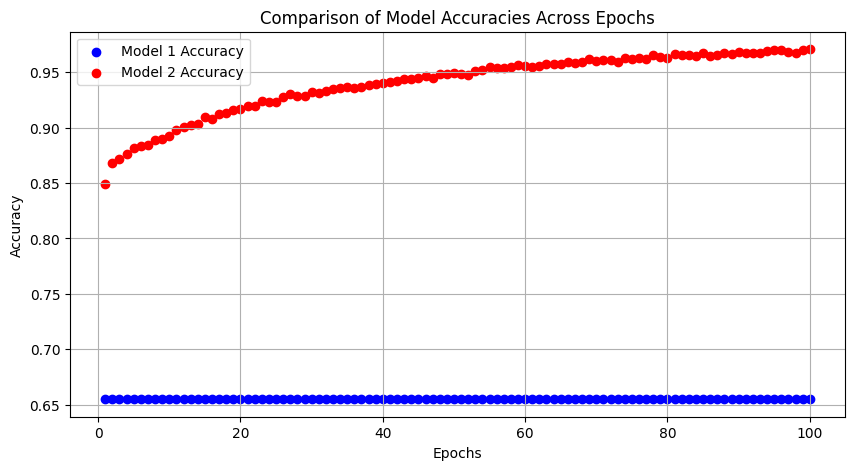

In [ ]:
import matplotlib.pyplot as plt

# Assuming history1_nd.history['accuracy'] and history2_nd.history['accuracy'] are available
# These lists should contain the accuracy for each epoch
epochs = range(1, len(history1_nd.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))

# Plotting accuracy for history1_nd
plt.scatter(epochs, history1_nd.history['accuracy'], color='blue', label='Model 1 Accuracy')

# Plotting accuracy for history2_nd
plt.scatter(epochs, history2_nd.history['accuracy'], color='red', label='Model 2 Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Across Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def custom_loss(lambda_val=0.5):
    def loss(y_true, y_pred):
        # Extract predictions and sensitive attributes
        predictions = y_pred[:, 0]
        sensitive_attr = y_pred[:, 1]

        # Standard binary crossentropy loss
        standard_loss = BinaryCrossentropy(from_logits=True)(y_true, predictions)

        # Calculate discrimination based on sensitive attribute
        threshold = 0
        mask_unpriv = K.cast(sensitive_attr <= threshold, 'float32')
        mask_priv = K.cast(sensitive_attr > threshold, 'float32')

        sum_unpriv = K.sum(mask_unpriv)
        sum_priv = K.sum(mask_priv)

        epsilon = 1e-8
        prob_unpriv = K.sum(predictions * mask_unpriv) / (sum_unpriv + epsilon)
        prob_priv = K.sum(predictions * mask_priv) / (sum_priv + epsilon)

        discrimination = K.square(prob_priv - prob_unpriv)

        # Debug outputs
        # tf.print("Standard Loss:", standard_loss, "Discrimination:", discrimination)

        # Total loss with discrimination penalty
        return standard_loss + lambda_val * discrimination
    
    return loss

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=custom_loss(lambda_val=0.01),  # Change lambda_val as needed
              metrics=['accuracy'])

# Training the model
history1 = model.fit(X_train_with_sensitive, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.6523 - loss: 0.6931 - val_accuracy: 0.6609 - val_loss: 0.6930
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6535 - loss: 0.6931 - val_accuracy: 0.6609 - val_loss: 0.6930
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.6649 - loss: 0.6931 - val_accuracy: 0.6609 - val_loss: 0.6930
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.6511 - loss: 0.6931 - val_accuracy: 0.6609 - val_loss: 0.6930
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6526 - loss: 0.6931 - val_accuracy: 0.6609 - val_loss: 0.6930


In [ ]:
import plotly.graph_objects as go

# Assuming history1_nd and history2_nd have 'accuracy' data from your model training
# Extracting the accuracy data from each history object
accuracy1 = history1_nd.history['accuracy']
accuracy2 = history2_nd.history['accuracy']

# Assuming the number of epochs is determined by the length of the accuracy data
epochs = list(range(1, len(accuracy1) + 1))

# Create a scatter plot using Plotly
fig = go.Figure()

# Adding scatter plot for Model 1
fig.add_trace(go.Scatter(
    x=epochs,
    y=accuracy1,
    mode='markers',  # This specifies to use markers (points)
    name='Model 1 Accuracy',  # Name of the series
    marker=dict(color='blue', size=8)  # Marker settings
))

# Adding scatter plot for Model 2
fig.add_trace(go.Scatter(
    x=epochs,
    y=accuracy2,
    mode='markers',
    name='Model 2 Accuracy',
    marker=dict(color='red', size=8)
))

# Update the layout to add titles and labels
fig.update_layout(
    title='Comparison of Model Accuracies Across Epochs',
    xaxis_title='Epochs',
    yaxis_title='Accuracy',
    template='plotly_white'
)

# Show the figure
fig.show()


### GRAPH

In [ ]:
import plotly.graph_objects as go

def plot_accuracy(histories):
    # Create figure for accuracy
    fig = go.Figure()

    # Add accuracy traces with specified colors
    color_map = {'Custom Loss': ('blue', 'red'), 'Standard Loss': ('skyblue', 'pink')}
    for name, history in histories:
        train_color, val_color = color_map[name]
        fig.add_trace(go.Scatter(x=list(range(len(history.history['accuracy']))),
                                 y=history.history['accuracy'],
                                 name=f'Training Accuracy - {name}',
                                 mode='lines+markers',
                                 line=dict(color=train_color)))
        fig.add_trace(go.Scatter(x=list(range(len(history.history['val_accuracy']))),
                                 y=history.history['val_accuracy'],
                                 name=f'Validation Accuracy - {name}',
                                 mode='lines+markers',
                                 line=dict(color=val_color)))

    # Update layout for accuracy graph
    fig.update_layout(title='Training and Validation Accuracy',
                      xaxis_title='Epochs',
                      yaxis_title='Accuracy',
                      legend_title='Metric Type')

    fig.show()

def plot_loss(histories):
    # Create figure for loss
    fig = go.Figure()

    # Add loss traces with specified colors
    color_map = {'Custom Loss': ('blue', 'red'), 'Standard Loss': ('skyblue', 'pink')}
    for name, history in histories:
        train_color, val_color = color_map[name]
        fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                                 y=history.history['loss'],
                                 name=f'Training Loss - {name}',
                                 mode='lines+markers',
                                 line=dict(color=train_color)))
        fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))),
                                 y=history.history['val_loss'],
                                 name=f'Validation Loss - {name}',
                                 mode='lines+markers',
                                 line=dict(color=val_color)))

    # Update layout for loss graph
    fig.update_layout(title='Training and Validation Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      legend_title='Metric Type')

    fig.show()

# Assuming you have history1 and history2 as the history objects from your model training
plot_accuracy([('Custom Loss', history1_nd), ('Standard Loss', history2)])
plot_loss([('Custom Loss', history1_nd), ('Standard Loss', history2)])


In [ ]:
lfr_model = LFR(unprivileged_groups=unprivileged_groups, 
                privileged_groups=privileged_groups)

# Fit the model and transform the dataset
lfr_model.fit(dataset_orig_panel19_train)
dataset_transf_panel19_train_lfr = lfr_model.transform(dataset_orig_panel19_train, threshold = 0.22)
dataset_transf_panel19_train_lfr = dataset_orig_panel19_train.align_datasets(dataset_transf_panel19_train_lfr)


In [ ]:
import numpy as np

def get_distortion_meps(vold, vnew):
    # Initialize distortion score
    distortion_score = 0.0

    # Define weights for different categories of attributes
    sensitive_weight = 3.0
    health_status_weight = 2.0
    socio_economic_weight = 1.0
    behavior_weight = 1.5

    # Sensitive attributes
    for attr in ['AGE', 'RACE', 'SEX=1', 'SEX=2']:
        if vold[attr] != vnew[attr]:
            distortion_score += sensitive_weight

    # Health status indicators
    health_attrs = ['PCS42', 'MCS42', 'K6SUM42', 'HIBPDX', 'DIABDX', 'CHDDX', 'ANGIDX', 'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX', 'CANCERDX', 'JTPAIN', 'ARTHDX', 'ASTHDX', 'ADHDADDX']
    for attr in health_attrs:
        # Assuming health status attributes are numerical and a difference in value indicates a change in health status
        distortion_score += health_status_weight * abs(vold.get(attr, 0) - vnew.get(attr, 0))

    # Socioeconomic and environmental factors
    socio_attrs = ['REGION=1', 'REGION=2', 'REGION=3', 'REGION=4', 'MARRY', 'FTSTU', 'EMPST', 'POVCAT', 'INSCOV']
    for attr in socio_attrs:
        if vold[attr] != vnew[attr]:
            distortion_score += socio_economic_weight

    # Health-related behaviors
    behavior_attrs = ['ADSMOK42', 'WLKLIM', 'ACTLIM', 'SOCLIM', 'COGLIM']
    for attr in behavior_attrs:
        if vold[attr] != vnew[attr]:
            distortion_score += behavior_weight

    return distortion_score

In [ ]:
DI = DisparateImpactRemover()
dataset_transf_panel19_train_di = DI.fit_transform(dataset_orig_panel19_train)

In [ ]:
metric_transf_panel19_train = BinaryLabelDatasetMetric(
dataset_transf_panel19_train_rw,
unprivileged_groups=unprivileged_groups,
privileged_groups=privileged_groups)
explainer_transf_panel19_train = MetricTextExplainer(metric_transf_panel19_train)
test_results_rw=[explainer_transf_panel19_train.mean_difference()
               ,explainer_transf_panel19_train.consistency()
               ,explainer_transf_panel19_train.statistical_parity_difference()
               ,explainer_transf_panel19_train.disparate_impact()]

In [ ]:
metric_transf_panel19_train = BinaryLabelDatasetMetric(
dataset_transf_panel19_train_di,
unprivileged_groups=unprivileged_groups,
privileged_groups=privileged_groups)
explainer_transf_panel19_train = MetricTextExplainer(metric_transf_panel19_train)
test_results_di=[explainer_transf_panel19_train.mean_difference()
               ,explainer_transf_panel19_train.consistency()
               ,explainer_transf_panel19_train.statistical_parity_difference()
               ,explainer_transf_panel19_train.disparate_impact()]

In [ ]:
metric_transf_panel19_train = BinaryLabelDatasetMetric(
dataset_transf_panel19_train_lfr,
unprivileged_groups=unprivileged_groups,
privileged_groups=privileged_groups)
explainer_transf_panel19_train = MetricTextExplainer(metric_transf_panel19_train)
test_results_lfr=[explainer_transf_panel19_train.mean_difference()
               ,explainer_transf_panel19_train.consistency()
               ,explainer_transf_panel19_train.statistical_parity_difference()
               ,explainer_transf_panel19_train.disparate_impact()]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


In [ ]:
test_results

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.13507447726478142',
 'Consistency (Zemel, et al. 2013): [0.83660139]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.13507447726478142',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.49826823461176517']

In [ ]:
test_results_rw

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -2.7755575615628914e-17',
 'Consistency (Zemel, et al. 2013): [0.83660139]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -2.7755575615628914e-17',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.9999999999999999']

In [ ]:
test_results_lfr

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): 0.0',
 'Consistency (Zemel, et al. 2013): [1.]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): 0.0',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): nan']

In [ ]:
test_results_di

['Mean difference (mean label value on unprivileged instances - mean label value on privileged instances): -0.13507447726478142',
 'Consistency (Zemel, et al. 2013): [0.83689198]',
 'Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.13507447726478142',
 'Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.49826823461176517']

In [ ]:
features = dataset_transf_panel19_train_rw.features
label = dataset_transf_panel19_train_rw.labels.ravel()  # Flatten the label array if necessary
weights = dataset_transf_panel19_train_rw.instance_weights
feature_names = dataset_transf_panel19_train_rw.feature_names
df_rw = pd.DataFrame(features, columns=feature_names)
df_rw['label'] = label
df_rw['weights'] = weights


In [ ]:
df_rw

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label,weights
0,53.0,1.0,25.93,58.47,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,17459.483776
1,56.0,1.0,20.42,26.57,17.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,14515.313940
2,23.0,1.0,53.12,50.33,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18465.607681
3,3.0,1.0,-1.00,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21762.696983
4,27.0,0.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3727.042408
15826,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4909.081729
15827,2.0,1.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4184.786789
15828,54.0,0.0,43.97,42.45,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4427.370919


In [ ]:
features = dataset_orig_panel19_train.features
label = dataset_orig_panel19_train.labels
feature_names = dataset_orig_panel19_train.feature_names
dataset_orig_panel19_train_df = pd.DataFrame(features, columns=feature_names)
dataset_orig_panel19_train_df['label'] = label
dataset_orig_panel19_train_df

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,EMPST=4,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label
0,53.0,1.0,25.93,58.47,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,56.0,1.0,20.42,26.57,17.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.0,1.0,53.12,50.33,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,-1.00,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.0,0.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15826,25.0,0.0,56.71,62.39,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15827,2.0,1.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15828,54.0,0.0,43.97,42.45,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# # Assuming `dataset_transf_panel19_train_lfr` is your LFR transformed dataset
# features_lfr = dataset_transf_panel19_train_lfr.features
# label_lfr = dataset_transf_panel19_train_lfr.labels.ravel()  # Flatten the label array if necessary
# feature_names_lfr = dataset_transf_panel19_train_lfr.feature_names

# # Create a DataFrame
# df_lfr = pd.DataFrame(features_lfr, columns=feature_names_lfr)
# df_lfr['label'] = label_lfr


features = dataset_transf_panel19_train_lfr.features
label = dataset_transf_panel19_train_lfr.labels.ravel()  # Flatten the label array if necessary
weights = dataset_transf_panel19_train_lfr.instance_weights
feature_names = dataset_transf_panel19_train_lfr.feature_names
df_lfr = pd.DataFrame(features, columns=feature_names)
df_lfr['label'] = label
df_lfr['weights'] = weights


In [ ]:
df_lfr

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label,weights
0,0.364698,0.611075,0.319138,0.516439,0.683071,0.513830,0.556535,0.363196,0.402933,0.589060,...,0.238986,0.553776,0.493602,0.513294,0.386629,0.380919,0.498550,0.363095,0.0,21854.981705
1,0.379547,0.597793,0.328517,0.502386,0.682940,0.523566,0.577716,0.373460,0.395062,0.600292,...,0.237634,0.551191,0.504359,0.533097,0.374361,0.356593,0.499183,0.369585,0.0,18169.604822
2,0.345017,0.593873,0.327056,0.509281,0.682566,0.524971,0.551491,0.349275,0.416220,0.575195,...,0.246142,0.570321,0.511401,0.519411,0.420631,0.397081,0.509235,0.382303,0.0,17191.832515
3,0.370890,0.582912,0.338159,0.494210,0.676912,0.535713,0.577500,0.369280,0.388361,0.583862,...,0.233116,0.577892,0.512044,0.551296,0.382591,0.373165,0.506936,0.374916,0.0,20261.485463
4,0.377148,0.587833,0.331081,0.493269,0.679347,0.528798,0.582084,0.376288,0.383771,0.602294,...,0.238654,0.558482,0.514984,0.543083,0.382213,0.364254,0.495283,0.377611,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,0.343260,0.597189,0.324804,0.512213,0.683004,0.522468,0.548023,0.347933,0.417919,0.574523,...,0.246629,0.568838,0.508985,0.514854,0.421901,0.399881,0.508553,0.380749,0.0,4111.315754
15826,0.343186,0.596636,0.325113,0.511802,0.682861,0.522864,0.548279,0.347965,0.417634,0.574357,...,0.246577,0.569381,0.509405,0.515495,0.422105,0.400035,0.508671,0.381059,0.0,5415.228173
15827,0.364434,0.584266,0.332311,0.494401,0.677981,0.531335,0.573192,0.367677,0.389164,0.590592,...,0.240138,0.570064,0.517921,0.541949,0.397951,0.380818,0.500083,0.381961,0.0,3896.116219
15828,0.364365,0.591464,0.330698,0.502169,0.683230,0.527371,0.569395,0.362334,0.406439,0.589670,...,0.242613,0.560312,0.511955,0.530772,0.397606,0.370904,0.505687,0.379358,0.0,4883.851005


In [ ]:
# Assuming `dataset_transf_panel19_train_di` is your DI transformed dataset
features_di = dataset_transf_panel19_train_di.features
label_di = dataset_transf_panel19_train_di.labels.ravel()  # Flatten the label array if necessary
feature_names_di = dataset_transf_panel19_train_di.feature_names

# Create a DataFrame
df_di = pd.DataFrame(features_di, columns=feature_names_di)
df_di['label'] = label_di
df_di

,AGE,RACE,PCS42,MCS42,K6SUM42,REGION=1,REGION=2,REGION=3,REGION=4,SEX=1,...,EMPST=4,POVCAT=1,POVCAT=2,POVCAT=3,POVCAT=4,POVCAT=5,INSCOV=1,INSCOV=2,INSCOV=3,label
0,53.0,1.0,25.93,58.47,3.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,56.0,1.0,20.42,26.53,17.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.0,1.0,52.92,50.28,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,-1.00,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.0,0.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,25.0,0.0,56.68,62.11,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15826,25.0,0.0,56.68,62.11,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15827,2.0,1.0,-1.00,-1.00,-1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15828,54.0,0.0,43.43,42.45,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df' is your Pandas DataFrame with features, 'label', and 'weights' columns
df=dataset_orig_panel19_train_df
# Split the DataFrame into features, labels, and weights

X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model using the sample_weight parameter
# We need to extract the corresponding weights for the training samples
train_indices = X_train.index
train_weights = weights[train_indices]

model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model.predict_proba(X_train)
y_test_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


Training Accuracy: 0.8669456727732154, Training Log Loss: 0.3230202782236161
Testing Accuracy: 0.8619709412507897, Testing Log Loss: 0.335720614452724


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/q1/_mtfzg810qx1420xf23g4f7c0000gn/T/ipykernel_4547/1117411220.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
df.head(1).to_csv('meps.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df' is your Pandas DataFrame with features, 'label', and 'weights' columns

# Split the DataFrame into features, labels, and weights
X = df_rw.drop(['label', 'weights'], axis=1)
y = df_rw['label']
weights = df_rw['weights']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model_rw = LogisticRegression()

# Train the model using the sample_weight parameter
# We need to extract the corresponding weights for the training samples
train_indices = X_train.index
train_weights = weights[train_indices]

model_rw.fit(X_train, y_train, sample_weight=train_weights)

# Predictions
y_train_pred = model_rw.predict(X_train)
y_test_pred = model_rw.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model_rw.predict_proba(X_train)
y_test_pred_proba = model_rw.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


Training Accuracy: 0.8651295009475679, Training Log Loss: 0.33949214668723315
Testing Accuracy: 0.8562855337965888, Testing Log Loss: 0.3484870792605314


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/q1/_mtfzg810qx1420xf23g4f7c0000gn/T/ipykernel_4547/2225796879.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df' is your Pandas DataFrame with features, 'label', and 'weights' columns

# Split the DataFrame into features, labels, and weights
X = df_di.drop(['label'], axis=1)
y = df_di['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model_di = LogisticRegression()

# Train the model using the sample_weight parameter
# We need to extract the corresponding weights for the training samples
train_indices = X_train.index
train_weights = weights[train_indices]

model_di.fit(X_train, y_train, sample_weight=train_weights)

# Predictions
y_train_pred = model_di.predict(X_train)
y_test_pred = model_di.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model_di.predict_proba(X_train)
y_test_pred_proba = model_di.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


Training Accuracy: 0.8646557169930512, Training Log Loss: 0.33943553174854924
Testing Accuracy: 0.8550221099178774, Testing Log Loss: 0.3481697691277553


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/q1/_mtfzg810qx1420xf23g4f7c0000gn/T/ipykernel_4547/789110131.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'df_lfr' is your Pandas DataFrame with features and 'label' columns, 
# resulting from the LFR transformation

# Split the DataFrame into features and labels
X = df_lfr.drop(['label'], axis=1)
y = df_lfr['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
model_lfr = LogisticRegression()

# Train the model (no sample weights are needed as the data is already transformed by LFR)
model_lfr.fit(X_train, y_train, sample_weight=train_weights)

# Predictions
y_train_pred = model_lfr.predict(X_train)
y_test_pred = model_lfr.predict(X_test)

# Probability predictions for log loss calculation
y_train_pred_proba = model_lfr.predict_proba(X_train)
y_test_pred_proba = model_lfr.predict_proba(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate log loss
train_loss = log_loss(y_train, y_train_pred_proba)
test_loss = log_loss(y_test, y_test_pred_proba)

# Print errors and losses
print(f"Training Accuracy: {train_accuracy}, Training Log Loss: {train_loss}")
print(f"Testing Accuracy: {test_accuracy}, Testing Log Loss: {test_loss}")

# Plotting
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')

# Log Loss plot
plt.subplot(1, 2, 2)
plt.bar(['Train Log Loss', 'Test Log Loss'], [train_loss, test_loss], color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')

plt.tight_layout()
plt.show()


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0